# 1. Постановка задачи (Business Understanding)

## 1.1 Что это за данные
Датасет содержит информацию о случаях экстремального загрязнения поверхностных вод в России. В каждой строке указаны период наблюдения, регион и место, где было зафиксировано загрязнение, а также водный объект. Дополнительно есть показатель загрязнения, класс опасности и количество случаев. Также приведены минимальное и максимальное значения показателя и единицы измерения.

## 1.2 Кто может быть «заказчиком» анализа
Заказчиком анализа может выступать государственный орган, который занимается экологическим мониторингом и контролем качества воды. Также это может быть региональная администрация, которой нужно понимать, где чаще происходят загрязнения и какие места требуют внимания. По итогам анализа можно планировать проверки, расставлять приоритеты и готовить отчёты.

## 1.3 Какие задачи ИАД можно решать
- **Задача 1:** сравнить регионы по количеству случаев загрязнения и выделить самые проблемные.
- **Задача 2:** анализировать динамику по времени: в какие периоды случаев больше и меняется ли это со временем.

# 2. Паспорт датасета (Data Understanding)

## 2.1 Загрузка данных в pandas DataFrame

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA_PATH = "../data/extreme_pollution.csv"

df = pd.read_csv(DATA_PATH, sep=";", quotechar='"')
df.head()

,id,period,subject,municipality,settlement,oktmo,water_body,indicator,hazard_class,cnt_cases,value_min,value_max,unit
0,1,2008-01-31,Камчатский край,Усть-Камчатский район,п. Козыревск,3.061941e+10,р. Камчатка,Кадмий,2,1,6.0,6.0,ПДК
1,2,2008-01-31,Курганская область,Курган,г. Курган,3.770100e+10,вдхр. Курганское,Марганец,4,1,60.0,60.0,ПДК
2,3,2008-01-31,Московская область,Королёв,г. Королев,4.673400e+10,"ручей, впадающий в реку Клязьму",Нефть и нефтепродукты,3,8,71.0,100.0,ПДК
3,4,2008-01-31,Мурманская область,Печенгский муниципальный район,пгт. Никель,4.751500e+10,р. Колос-Йоки,Никель,3,1,60.0,60.0,ПДК
4,5,2008-01-31,Мурманская область,Городской округ город Мончегорск с подведомств...,г. Мончегорск,4.771500e+10,р. Нюдуай,Водородный показатель (pH),NaN,1,9.9,9.9,pH


## 2.1 Определение размера датасета

In [4]:
n_rows, n_cols = df.shape
print(f"Количество строк: {n_rows}")
print(f"Количество столбцов: {n_cols}")

Количество строк: 7671
Количество столбцов: 13


## 2.2 Cписок всех типов и текущих признаков

In [6]:
# Информация о столбцах и типах
df.info()

# Статистика по числовым признакам
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 7671 entries, 0 to 7670
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            7671 non-null   int64  
 1   period        7671 non-null   str    
 2   subject       7671 non-null   str    
 3   municipality  7324 non-null   str    
 4   settlement    7510 non-null   str    
 5   oktmo         7324 non-null   float64
 6   water_body    7671 non-null   str    
 7   indicator     7671 non-null   str    
 8   hazard_class  5133 non-null   str    
 9   cnt_cases     7671 non-null   int64  
 10  value_min     7670 non-null   float64
 11  value_max     7670 non-null   float64
 12  unit          7671 non-null   str    
dtypes: float64(3), int64(2), str(8)
memory usage: 779.2 KB


,id,oktmo,cnt_cases,value_min,value_max
count,7671.00000,7.324000e+03,7671.000000,7670.000000,7670.000000
mean,3836.00000,5.238004e+10,1.004563,124.332427,124.348333
std,2214.57129,2.116003e+10,0.144810,934.329858,934.328765
min,1.00000,8.631158e+06,1.000000,0.000000,0.000000
25%,1918.50000,4.472200e+10,1.000000,38.000000,38.000000
50%,3836.00000,5.771900e+10,1.000000,64.000000,64.000000
75%,5753.50000,6.575300e+10,1.000000,96.000000,96.000000
max,7671.00000,9.970100e+10,8.000000,74000.000000,74000.000000


## 2.3 Предположительный смысл столбцов

In [9]:
meaning = {
    "id": "идентификатор записи",
    "period": "период наблюдения",
    "subject": "субъект РФ",
    "municipality": "муниципалитет",
    "settlement": "населённый пункт",
    "oktmo": "код ОКТМО",
    "water_body": "водный объект",
    "indicator": "показатель загрязнения",
    "hazard_class": "класс опасности",
    "cnt_cases": "количество случаев",
    "value_min": "минимальное значение показателя",
    "value_max": "максимальное значение показателя",
    "unit": "единица измерения"
}

pd.DataFrame({
    "column": df.columns,
    "dtype": df.dtypes.astype(str),
    "meaning": [meaning.get(c, "") for c in df.columns]
})

,column,dtype,meaning
id,id,int64,идентификатор записи
period,period,str,период наблюдения
subject,subject,str,субъект РФ
municipality,municipality,str,муниципалитет
settlement,settlement,str,населённый пункт
oktmo,oktmo,float64,код ОКТМО
water_body,water_body,str,водный объект
indicator,indicator,str,показатель загрязнения
hazard_class,hazard_class,str,класс опасности
cnt_cases,cnt_cases,int64,количество случаев


# 3. Аудит качества данных

## 3.1. Пропуски

In [7]:
# Пропуски по столбцам
missing = pd.DataFrame({
    'Пропуски': df.isnull().sum(),
    'Доля (%)': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Пропуски', ascending=False)

missing[missing['Пропуски'] > 0]

,Пропуски,Доля (%)
hazard_class,2538,33.09
municipality,347,4.52
oktmo,347,4.52
settlement,161,2.10
value_min,1,0.01
value_max,1,0.01


**Вывод по пропускам:**
- Наиболее проблемный признак: `hazard_class` (≈33% пропусков) — это может заметно исказить анализ по классам опасности и сравнение групп.
- У `municipality` и `oktmo` пропусков около 4–5% — умеренно, можно либо оставить как есть.
- В `settlement` пропусков около 2% — обычно не критично, но может мешать анализу на уровне населённых пунктов.
- В `value_min` и `value_max` пропуски единичные — почти не влияют на общий анализ.

У `municipality` и `oktmo` одинаковое количество пропусков (347), вероятно эти поля отсутствуют одновременно для одних и тех же строк. Для `hazard_class` (≈33% пропусков) в дальнейшем нужно продумать обработку: например, выделить отдельную категорию “не указан”, либо исключить такие строки из анализа по классам опасности.

## 3.2 Дубликаты

In [18]:
# Количество полностью дублирующихся строк
full_dups = df.duplicated().sum()
print(f"Полных дубликатов строк: {full_dups}")

Полных дубликатов строк: 0


In [20]:
# Проверка дубликатов по ключевому полю
id_dups = df["id"].duplicated().sum()
print(f"Дубликатов по id: {id_dups}")

Дубликатов по id: 0


**Вывод по дубликатам:**
- Полных дубликатов строк не обнаружено (`0`), то есть в датасете нет полностью повторяющихся записей.
- Дубликатов по полю `id` также нет (`0`), значит идентификатор уникален и записи не повторяются по ключевому полю.

## 3.3 Типические проблемы значений

In [23]:
# Базовая статистика
num_cols = ["cnt_cases", "value_min", "value_max", "oktmo", "id"]
num_cols = [c for c in num_cols if c in df.columns]

df[num_cols].describe()

,cnt_cases,value_min,value_max,oktmo,id
count,7671.000000,7670.000000,7670.000000,7.324000e+03,7671.00000
mean,1.004563,124.332427,124.348333,5.238004e+10,3836.00000
std,0.144810,934.329858,934.328765,2.116003e+10,2214.57129
min,1.000000,0.000000,0.000000,8.631158e+06,1.00000
25%,1.000000,38.000000,38.000000,4.472200e+10,1918.50000
50%,1.000000,64.000000,64.000000,5.771900e+10,3836.00000
75%,1.000000,96.000000,96.000000,6.575300e+10,5753.50000
max,8.000000,74000.000000,74000.000000,9.970100e+10,7671.00000


In [27]:
# Проверка невозможных/подозрительных значений
# Проверка на отрицательные значения
checks = {}
for c in ["cnt_cases", "value_min", "value_max"]:
    if c in df.columns:
        checks[f"{c} < 0"] = int((df[c] < 0).sum())

checks

{'cnt_cases < 0': 0, 'value_min < 0': 0, 'value_max < 0': 0}

In [29]:
# Несогласованность min и max (строки, где min > max)
if "value_min" in df.columns and "value_max" in df.columns:
    bad_min_max = (df["value_min"] > df["value_max"]).sum()
    print(f"Строк, где value_min > value_max: {bad_min_max}")

Строк, где value_min > value_max: 0


In [32]:
# Топ самых больших значений (кандидаты на выборсы)
df[["value_max", "indicator", "unit", "subject", "period"]].sort_values("value_max", ascending=False).head(10)

,value_max,indicator,unit,subject,period
2214,74000.0,Марганец,ПДК,Пермский край,2012-08-31
5749,16773.0,Взвешенные вещества,ПДК,Краснодарский край,2018-10-31
3903,11316.0,Взвешенные вещества,ПДК,Республика Адыгея (Адыгея),2015-11-30
2216,10800.0,Марганец,ПДК,Пермский край,2012-08-31
7057,7151.0,Ацетон,ПДК,г. Москва,2020-10-31
1368,5225.0,Железо общее,ПДК,Свердловская область,2010-11-30
3413,5075.0,Аммоний-ион,ПДК,Республика Коми,2015-02-28
885,4690.0,Железо общее,ПДК,Пермский край,2010-02-28
2665,4680.0,Железо общее,ПДК,Пермский край,2013-07-31
6523,4420.0,Фенол,ПДК,Нижегородская область,2019-11-30


In [34]:
cat_cols = ["period", "subject", "municipality", "settlement", "water_body", "indicator", "hazard_class", "unit"]
cat_cols = [c for c in cat_cols if c in df.columns]

unique_stats = pd.DataFrame({
    "Столбец": cat_cols,
    "Уникальных значений": [df[c].nunique(dropna=True) for c in cat_cols],
    "Пропуски (%)": [(df[c].isna().mean() * 100).round(2) for c in cat_cols]
}).sort_values("Уникальных значений", ascending=False)

unique_stats

,Столбец,Уникальных значений,Пропуски (%)
3,settlement,527,2.10
4,water_body,486,0.00
2,municipality,379,4.52
0,period,164,0.00
1,subject,64,0.00
5,indicator,45,0.00
6,hazard_class,5,33.09
7,unit,4,0.00


In [40]:
# наличие «грязных» категорий (лишние пробелы)
def whitespace_issue_count(s: pd.Series) -> int:
    s = s.dropna().astype(str)
    return int((s != s.str.strip()).sum())

for c in ["subject", "municipality", "settlement", "water_body", "indicator", "unit"]:
    if c in df.columns:
        print(c, "строк с лишними пробелами:", whitespace_issue_count(df[c]))

subject строк с лишними пробелами: 0
municipality строк с лишними пробелами: 0
settlement строк с лишними пробелами: 0
water_body строк с лишними пробелами: 1
indicator строк с лишними пробелами: 0
unit строк с лишними пробелами: 0


In [41]:
# Проверка регистра
def unique_ignore_case(s: pd.Series):
    s = s.dropna().astype(str)
    return s.nunique(), s.str.lower().nunique()

for col in ["subject", "municipality", "indicator", "unit"]:
    if col in df.columns:
        uniq_orig, uniq_lower = unique_ignore_case(df[col])
        print(f"{col}: уникальных = {uniq_orig} | уникальных без учёта регистра = {uniq_lower}")

subject: уникальных = 64 | уникальных без учёта регистра = 64
municipality: уникальных = 379 | уникальных без учёта регистра = 379
indicator: уникальных = 45 | уникальных без учёта регистра = 45
unit: уникальных = 4 | уникальных без учёта регистра = 4


# 4. Разведочный анализ

## 4.1 Распределение ключевого числового признака 

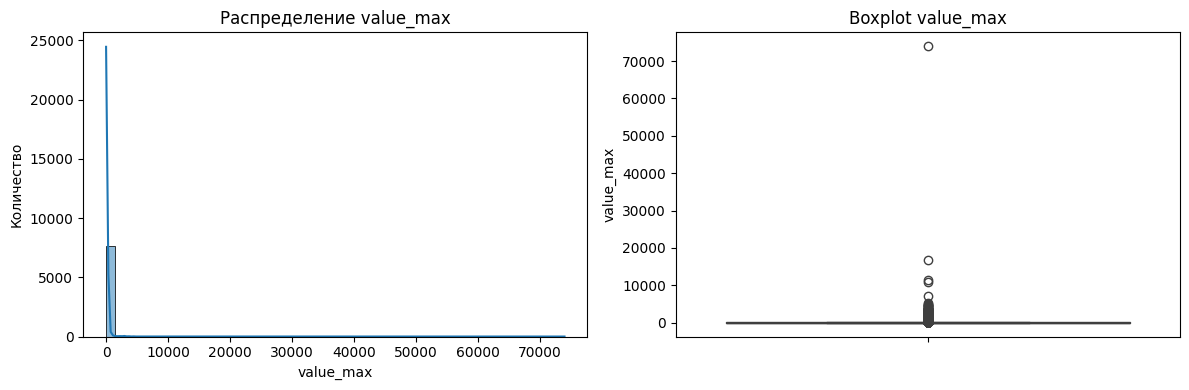

In [52]:
numeric_col = "value_max"

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df[numeric_col].dropna(), kde=True, bins=50)
plt.title(f"Распределение {numeric_col}")
plt.xlabel(numeric_col)
plt.ylabel("Количество")

plt.subplot(1, 2, 2)
sns.boxplot(y=df[numeric_col])
plt.title(f"Boxplot {numeric_col}")
plt.ylabel(numeric_col)

plt.tight_layout()
plt.show()

**Комментарий:** По графику видно, что распределение `value_max` сильно скошено и содержит редкие большие значения (возможные выбросы). Можно предположить, что для большинства наблюдений значения относительно небольшие, а экстремальные случаи встречаются редко. Возникает вопрос: большие значения — это ошибки измерений/ввода или реальные экстремальные загрязнения для отдельных индикаторов?

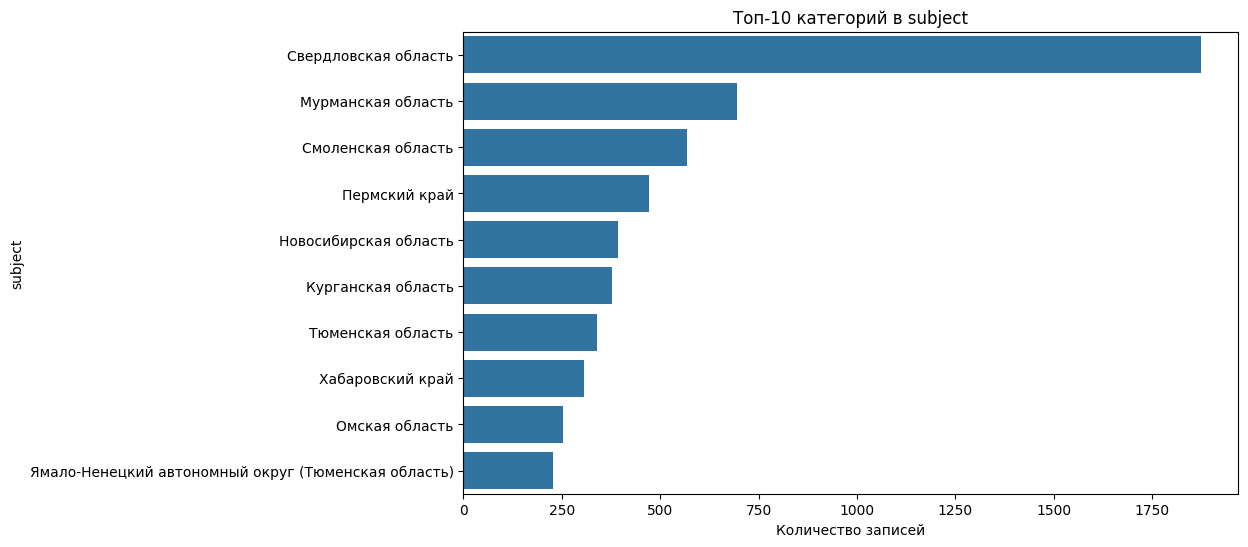

In [55]:
# Распределение категориального признака 
cat_col = "subject"

plt.figure(figsize=(10, 6))
top_categories = df[cat_col].value_counts().head(10)

sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title(f"Топ‑10 категорий в {cat_col}")
plt.xlabel("Количество записей")
plt.ylabel(cat_col)

plt.show()

**Комментарий:** Видно, что некоторые регионы встречаются в данных заметно чаще других. Это может означать либо реально большее число случаев загрязнений, либо различия в полноте/активности мониторинга и отчётности. Возникает вопрос: одинаково ли собираются данные по всем регионам и можно ли напрямую сравнивать их между собой по количеству записей?

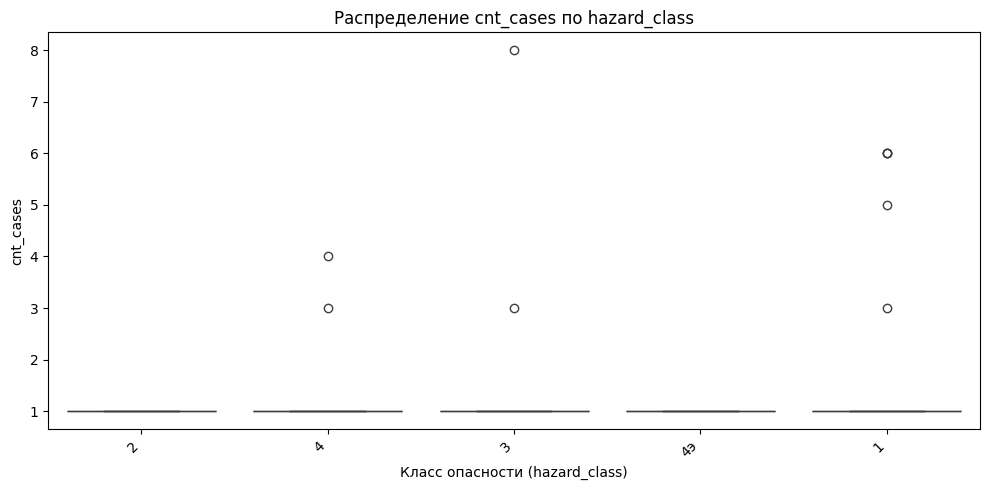

In [59]:
plt.figure(figsize=(10, 5))
tmp = df[["hazard_class", "cnt_cases"]].dropna()

sns.boxplot(data=tmp, x="hazard_class", y="cnt_cases")
plt.title("Распределение cnt_cases по hazard_class")
plt.xlabel("Класс опасности (hazard_class)")
plt.ylabel("cnt_cases")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Комментарий:** Видно, что основная масса записей во всех классах приходится на `cnt_cases = 1` (значения слились в одну линию), а значения 2+ встречаются редко. Это подтверждает, что многократные случаи загрязнения в одном периоде — исключение. Возникает вопрос, одинаково ли считается `cnt_cases` во всех регионах и периодах (возможны различия в методике учёта).